In [10]:
import random
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

In [13]:
df = pd.read_csv(
    'data/data-v0.2.csv', low_memory=False)

Show age in box plot

array([[<Axes: title={'center': 'weight'}>]], dtype=object)

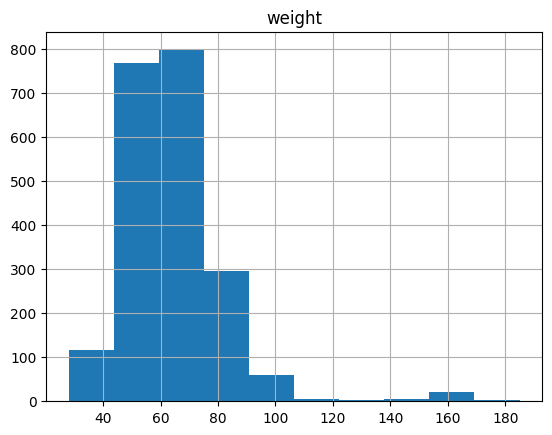

In [17]:
df = df[df['weight'] != ' ']
df['weight'] = df['weight'].astype(np.float32)
df.hist('weight')